# Diagnose Heart Disease with Decision Tree and Random Forest

The objective is to create an intelligent agent, which can suggest a diagnose of heart diseases.<br>
The task is to train a model of human heart, based on measurements, taken from numerous heart disease patients.<br>
For the training we will use data from a public source: https://archive.ics.uci.edu/ml/

## Step 1: Load the Libraries 

In [ ]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier


## Step 2: Load a Dataset

First, we load the data from file __processed.cleveland.data__ by use of pandas<br>
It is a table data in __csv__ format.<br>
Columns contain various parameters of human heart. <br>

In [ ]:
# Create URL object
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"

As the data has no header, we need to specify the names of each column before loading it. We get the information of interpretation from the file __heart-disease.names__

In [ ]:
# Create a header
names = ['age','gender','cp','bps','chol','fbs','ecg','hrate','ang','peak','slp','ca','thal','diag']

In [ ]:
# Load the data, create a dataset object
dataset = pandas.read_csv(url, names=names, na_values=["?"])

## Step 3: Get to Know The Data

### General Overview
Investigate the dataset. <br>
Find out how many records are available, are they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [ ]:
# See the shape (number of rows) and size (number of columns)
dataset.shape

In [ ]:
list(dataset)

In [ ]:
# See how it looks (get 5 random records)
dataset.sample(10)

In [ ]:
# Have the descriptive statistics calculated for the whole dataset
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
# to check null values in data
dataset.isnull().sum()

In [ ]:
# to check null values in data
np.isnan(dataset).sum()

In [ ]:
# Clean the data, if needed
np.nan_to_num(dataset)

In [ ]:
dataset = dataset[dataset.notnull()]

In [ ]:
dataset = dataset.dropna()

In [ ]:
# Group by class attribute diag
# See how many heart desease classes are included and how many records per class are distributed
print(dataset.groupby('diag').size())

### Visualization of Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Scatter Plot

In [ ]:
# Draw box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

See explanation of the box-whisker diagram
!["Explanation of box-whisker"](../images/boxwhisker.gif "What does it mean?")

In [ ]:
# Draw histograms for each feature
dataset.hist()
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Some of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

### Prepare The Data For Training

In [ ]:
# Convert the dataset into array
array = dataset.values

In [ ]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [ ]:
# Separate input data into classes based on labels
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

## Step 4: Training
Time to try to train a model.
1. Split the dataset into two: __training set__ and __test set__
2. Build the classifier by implementing __Decision Tree__ algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

In [ ]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [ ]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [ ]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [ ]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# n_estimators - the number of trees in the forest
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
classifier.fit(X_train, y_train)

In [ ]:
# Install the graphviz package
!pip install graphviz

In [ ]:
# draw tree from the trained data by graphviz package
import graphviz
gr_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=dataset.columns[:13], class_names = True,        
                         filled=True, rounded=True, proportion = False, special_characters=True)  
dtree = graphviz.Source(gr_data) 

In [ ]:
# save the tree in file heart - pdf by default
dtree.render("heart") 

In [ ]:
# show it here
dtree 

## Step 5. Model Validation

We need a metrics for the evaluation
‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

In [ ]:
# Set the metrics
# scoring = 'accuracy'

Now we can try to implement the model on our test set.


In [ ]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

In [ ]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

In [ ]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

In [ ]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

In [ ]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [ ]:
# The diagonal elements (TN, TP) represent the number of points for which the predicted label is equal to the true label, 
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
# FN - False Negative prediction
# FP - False Positive prediction

In [ ]:
# Confusion matrix provides an indication of the  errors made in predictions, here in text format
# print(confusion_matrix(y_test, y_testp))

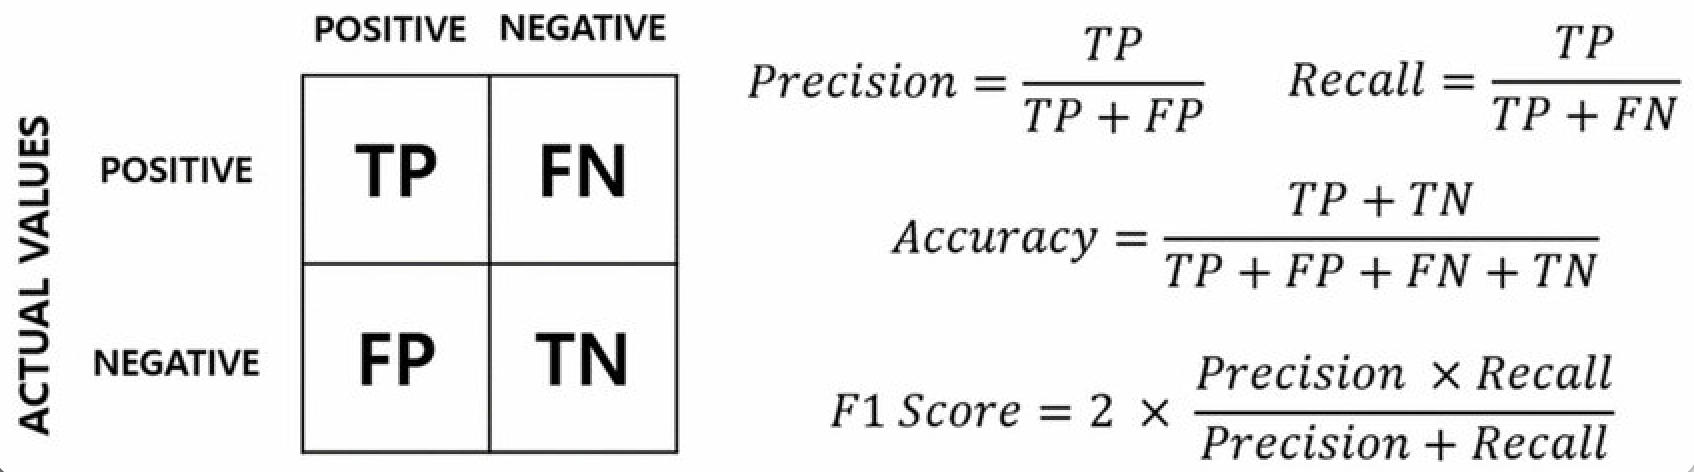

### Compare scores for Train and Test data

In [ ]:
# Classifier performance on training dataset
class_names = ['Class0', 'Class1', 'Class2','Class3', 'Class4']
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

In [ ]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

## <span style="color:red">Task</span>
Try to improve the model by applying Random Forest classifier provided in sklearn.<br>
Repeat the training, testing and validation.<br>
Compare the Decision Tree and Random Forest methods.
Answer to the question: Which method gives better results?